## Laufzeitdiagramm
Das folgende Skript berechnet das Laufzeitdiagramm für eine vorgegebene Geschwindigkeitstiefenverteilung. Das voreingestelle Modell entspricht etwa der Situation, die wir auf dem Campus in Lankwitz vorfinden. 

## Model Setup
Oben in der Zelle werden die seismischen Geschwindigkeiten und die Schichtgrenzentiefe des Modells definiert. 
Ändern Sie die Werte zur Beantwortung der Fragen in Aufgabe 1b) und 1c). 

Kritische Entfernung 2.78m 
Überholentfernung: 17.05m 
Kritischer Winkel: 11.21° 



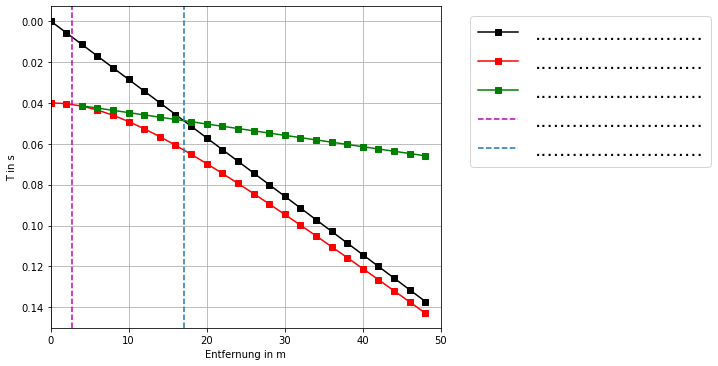

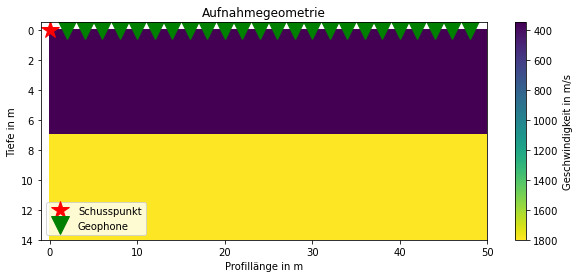

In [8]:
# Geben Sie die Geschwindigkeit der ersten Schicht ein:
v1 = 350 # m/s
# Geben Sie die Geschwindigkeit der zweiten Schicht ein:
v2 = 1800 # m/s
# Geben Sie die Schichmächtigkeit ein:
d = 7 # m

## Ab hier nichts verändern !

import numpy as np
import matplotlib.pyplot as plt

# Define Model

z = np.array([0,d]) # Tiefe in m
v = np.array([v1,v2]) # Geschwindigkeit in [m/s]

rec_num=24 # Anzahl Empfänger
dx=2 # Empfängerabstand in m

# Compute Traveltimes

if v[0] > v[1]:
    alpha_krit=0
    x_crit=0
    r_crit=0
    x_ue=0

else:
    alpha_krit = np.arcsin(v[0]/v[1])*180/np.pi
    x_crit = np.tan(np.deg2rad(alpha_krit))*z[1]
    r_crit = np.sqrt((x_crit**2) + z[1]**2)
    x_ue = 2*z[1]*np.sqrt((v[0]+v[1])/(v[1]-v[0]))
x_max=(rec_num)*dx
inc=np.intc(x_max/dx)+1   
x_vec = np.linspace(0,x_max,inc)
direct = np.zeros(len(x_vec))
reflect = np.zeros(len(x_vec))
refrac = np.zeros(len(x_vec))*np.NaN
for idx,x in enumerate(x_vec):
    direct[idx] = x/v[0]
    reflect[idx] = 2*np.sqrt((x/2)**2 + z[1]**2)/v[0]
    if x > x_crit*2:
        refrac[idx] = 2*r_crit/v[0] + (x-2*x_crit)/v[1]   

plt.figure(figsize=(10,5))
plt.plot(x_vec,direct,'ks-',label='...........................')
plt.plot(x_vec,reflect,'rs-',label='...........................')
if v[0] < v[1]:
    plt.plot(x_vec,refrac,'gs-',label='...........................')
    plt.axvline(2*x_crit,linestyle = '--',color = 'm',label='...........................')
    plt.axvline(x_ue,linestyle = '--',label='...........................')
    print('Kritische Entfernung %.2fm \nÜberholentfernung: %.2fm \nKritischer Winkel: %.2f° \n'%(2*x_crit,x_ue,alpha_krit))
#plt.legend(loc = 0,prop={'size': 18})
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 20})
plt.tight_layout()
plt.xlim([0,x_max+dx])
plt.gca().invert_yaxis()
plt.ylabel('T in s')
plt.xlabel('Entfernung in m')
plt.grid('on')
plt.show()

plt.figure(figsize=(10,4))
mod = np.vstack((v[0]*np.ones([d,(rec_num+2)*dx]),v[1]*np.ones([d,(rec_num+2)*dx])))
#plt.pcolor(np.linspace(0,50,(rec_num+2)*dx),np.linspace(0,2*z[1],21),mod)
plt.pcolor(mod)
plt.xlim([-1,50])
plt.ylim([-.5,2*z[1]])
cbar = plt.colorbar()
cbar.set_label('Geschwindigkeit in m/s', rotation=90)
cbar.ax.invert_yaxis()
plt.gca().invert_yaxis()
plt.plot(0,0,'r*',markersize=18,label='Schusspunkt')
plt.plot(np.arange(dx,rec_num*dx+1,dx),np.zeros(rec_num),'gv',markersize=18,label = 'Geophone')
plt.legend()
plt.title('Aufnahmegeometrie')
plt.ylabel('Tiefe in m')
plt.xlabel('Profillänge in m')
plt.show()